In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy.polynomial.polynomial as poly
import matplotlib
import matplotlib.patches as mpatches

In [4]:
#path = '/home/hcapettini/Escritorio/HDD1TB/Tesis/Analísis/Mayo/'
path = '/media/usuario/Hilario-2/Tesis/Analísis/Mayo/'

#simulacion ='pulso_3'
simulacion ='desequilibrio_3'

pos= '0.2_20.0'
#pos= '1.5_20.0'
#pos= '2.8_20.0'
#pos= '0.2_29.7'
#pos= '1.5_29.7'
#pos= '2.8_29.7'
#pos= '0.2_23.0'

tmin = 0
tmax = 500
f_m = 0.5

pathr=path +simulacion+'/'+simulacion+'_'+pos+'_'

In [5]:
with open( pathr + 'velx.txt') as velx:
    velxlines = velx.readlines()[2:]
    time  = [float(line.split()[0]) for line in velxlines]
    velxx = [float(line.split()[1]) for line in velxlines]
with open( pathr + 'vely.txt') as vely:
    velylines = vely.readlines()[2:]
    velyy = [float(line.split()[1]) for line in velylines]  
with open( pathr + 'magx.txt') as magx:
    magxlines = magx.readlines()[2:]
    magxx = [float(line.split()[1]) for line in magxlines]
with open( pathr + 'magy.txt') as magy:
    magylines = magy.readlines()[2:]
    magyy = [float(line.split()[1]) for line in magylines]
with open( pathr + 'dens.txt') as dens:
    denslines = dens.readlines()[2:]
    densy = [float(line.split()[1]) for line in denslines]
with open( pathr + 'pres.txt') as pres:
    preslines = pres.readlines()[2:]
    presy = [float(line.split()[1]) for line in preslines]

In [6]:
velx = np.array(velxx)
vely = np.array(velyy)
magx = np.array(magxx)
magy = np.array(magyy)
dens = np.array(densy)
pres = np.array(presy)

In [7]:
gama = 5/3

In [8]:
ek = 1/2 * dens *(velx**2+vely**2)
ei = pres /(gama-1)
em = (magx**2+magy**2)/(8*np.pi)

In [9]:
e = ek + ei + em

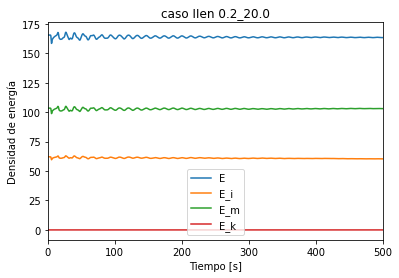

In [10]:
pe,  = plt.plot(time,e,label='E')
pei,  = plt.plot(time,ei,label='E_i')
pem,  = plt.plot(time,em,label='E_m')
pek,  = plt.plot(time,ek,label='E_k')

plt.legend(handles=[pe,pei,pem,pek])

plt.xlim(tmin, tmax)
#plt.ylim(emin, emax)
plt.title('caso II' +'en '+pos)
plt.xlabel('Tiempo [s]')
plt.ylabel('Densidad de energía')
plt.savefig(path+simulacion+ '/'+simulacion+'_'+'var.pdf', bbox_inches='tight') 

In [41]:
variable = e
var ='energy'

No handles with labels found to put in legend.


Text(0.5, 0, 'Tiempo [s]')

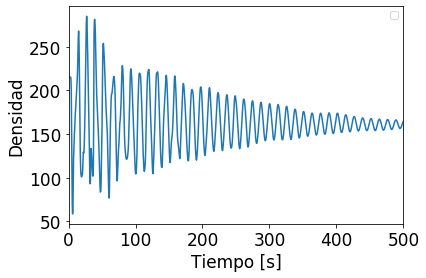

In [42]:
plt.plot(time,variable)
plt.legend()
plt.xlim(tmin, tmax)
#plt.ylim(densmin,densmax)
plt.tick_params( labelsize=17)
plt.ylabel('Densidad',fontsize=17)  
plt.xlabel('Tiempo [s]',fontsize=17)

In [43]:
nmin_FT = np.int(tmin/f_m)
nmax_FT = np.int(tmax/f_m)

In [44]:
variable_FT = variable[nmin_FT:nmax_FT]
time_FT = time[nmin_FT:nmax_FT]

In [45]:
p = np.poly1d(np.polyfit(time_FT, variable_FT, 1))

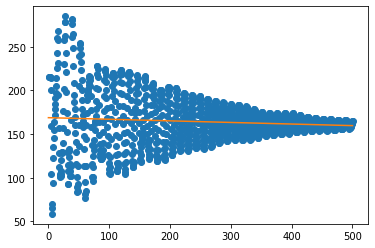

In [46]:
t = np.linspace(tmin, tmax, np.size(time_FT))
plt.plot(time_FT, variable_FT, 'o', t, p(t), '-')
plt.show()

In [47]:
variable_FT = variable_FT-p(t)

In [48]:
from scipy import fftpack

FT = fftpack.fft(variable_FT)
freqs = fftpack.fftfreq(len(variable_FT), d=f_m) 

data = np.array([np.abs(freqs), np.abs(FT)]) #Le tengo que poner un abs a la fcuencia porque sino me repite lo mismo en frecuencias negativas y en FT para eliminar el temrino complejo
data = data.T
datafile_path = path+simulacion+ '/'+simulacion+'_'+pos+'_TF_'+str(tmin)+'_'+str(tmax)+'_'+var+'.txt'
with open(datafile_path, 'w+') as datafile_id:
    np.savetxt(datafile_id, data)

Text(0.5, 0, 'Frequency [Hz]')

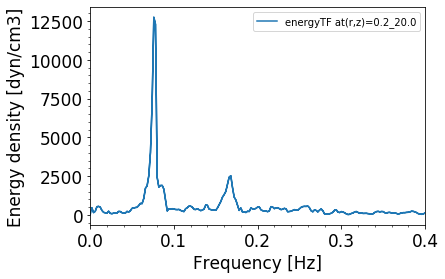

In [49]:
plt.plot(np.abs(freqs), np.abs(FT),label=var+'TF at'+''+'(r,z)='+pos)
plt.legend()
plt.xlim(0, 0.4)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(-14,-14))
plt.tick_params( labelsize=17)
plt.minorticks_on()
plt.ylabel('Energy density [dyn/cm3]',fontsize=17) 
plt.xlabel('Frequency [Hz]',fontsize=17)
#plt.savefig(path+simulacion+ '/'+simulacion+'_'+var+'_TF.pdf', bbox_inches='tight') 